# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

http://api.openweathermap.org/data/2.5/weather?appid=bd923925b406be26047f7291a2d6a219&units=imperial&q=
{
    "coord": {
        "lon": 22.79,
        "lat": 10.28
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 72.03,
        "feels_like": 74.35,
        "temp_min": 72.03,
        "temp_max": 72.03,
        "pressure": 1009,
        "humidity": 70,
        "sea_level": 1009,
        "grnd_level": 956
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.84,
        "deg": 280
    },
    "clouds": {
        "all": 2
    },
    "dt": 1603247904,
    "sys": {
        "country": "CF",
        "sunrise": 1603253867,
        "sunset": 1603296524
    },
    "timezone": 3600,
    "id": 240210,
    "name": "Birao",
    "cod": 200
}


In [126]:
print(requests.get(query_url + city))

<Response [200]>


In [127]:
# Set Up Lists to Hold Reponse Info
city_name = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Albany
Processing Record 2 | Norman Wells
Processing Record 3 | Geraldton
Processing Record 4 | Carbonia
Processing Record 5 | Bathsheba
Processing Record 6 | Tigil'
Processing Record 7 | Chokurdakh
Processing Record 8 | Ndélé
Processing Record 9 | Torbay
Processing Record 10 | Avera
Processing Record 11 | Cape Town
City not found. Skipping...
Processing Record 12 | Severo-Kuril'sk
Processing Record 13 | Hermanus
Processing Record 14 | Guadalupe y Calvo
Processing Record 15 | Rikitea
Processing Record 16 | Jamestown
Processing Record 17 | Poum
Processing Record 18 | Saskylakh
Processing Record 19 | Castro
Processing Record 20 | Atbasar
Processing Record 21 | Bredasdorp
City not found. Skipping...
Processing Record 22 | Tuktoyaktuk
Processing Record 23 | Mogadishu
Processing Record 24 | Cuamba
Processing Record 25 | Ponta do Sol
Processing Record 26 | Santa Inês
Processing Record 27 | Gävle
Processing Record 

Processing Record 234 | Flinders
Processing Record 235 | Cabo San Lucas
Processing Record 236 | Deputatsky
Processing Record 237 | Bay-Khaak
City not found. Skipping...
Processing Record 238 | Bambous Virieux
Processing Record 239 | Östersund
Processing Record 240 | Bulgan
Processing Record 241 | Itoman
Processing Record 242 | Dikson
Processing Record 243 | Woodward
Processing Record 244 | Egvekinot
Processing Record 245 | Hilton Head
Processing Record 246 | Doha
Processing Record 247 | Chui
Processing Record 248 | Saldanha
City not found. Skipping...
Processing Record 249 | Alibag
Processing Record 250 | Mitsamiouli
Processing Record 251 | Pulandian
Processing Record 252 | Najrān
City not found. Skipping...
Processing Record 253 | Namangan
Processing Record 254 | Sakaiminato
Processing Record 255 | Saint-Pierre
Processing Record 256 | Río Gallegos
Processing Record 257 | Sibolga
Processing Record 258 | Bārān
Processing Record 259 | Rize
Processing Record 260 | Nouadhibou
Processing Re

Processing Record 470 | Xinqing
Processing Record 471 | Inverell
City not found. Skipping...
Processing Record 472 | Severoural'sk
Processing Record 473 | Sabaudia
Processing Record 474 | Gambēla
Processing Record 475 | Srednekolymsk
Processing Record 476 | Poyarkovo
Processing Record 477 | Bemidji
Processing Record 478 | Emba
City not found. Skipping...
Processing Record 479 | Amudat
Processing Record 480 | Sitka
Processing Record 481 | Pochutla
Processing Record 482 | Banda Aceh
Processing Record 483 | Kaeo
Processing Record 484 | Inta
Processing Record 485 | Ciudad Ojeda
Processing Record 486 | Pemangkat
City not found. Skipping...
Processing Record 487 | Daru
Processing Record 488 | Madimba
Processing Record 489 | Salinópolis
Processing Record 490 | Skibbereen
Processing Record 491 | Bowen
Processing Record 492 | Katsuura
Processing Record 493 | Bandrele
Processing Record 494 | Arbeláez
Processing Record 495 | Eirunepé
Processing Record 496 | Coahuayana Viejo
Processing Record 497 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [128]:
weather_dict = {
    "city": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    }

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

city          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [129]:
# Display the dataframe
weather_data.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,55.0,85,100,3.65,US,1603247716
1,Norman Wells,65.28,-126.83,23.0,85,90,16.11,CA,1603247906
2,Geraldton,-28.77,114.60,69.8,60,75,17.22,AU,1603247779
3,Carbonia,39.17,8.52,66.2,77,20,16.11,IT,1603247907
4,Bathsheba,13.22,-59.52,82.4,78,40,8.05,BB,1603247907


In [130]:
# Export & save data into a .csv.
weather_data.to_csv("./Data/weather_data.csv")

In [131]:
# Display key statistics of the dataframe
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.928525,19.174281,60.365360,74.480216,52.089928,7.432446,1.603248e+09
std,33.197504,91.723923,20.349602,20.116543,39.626534,5.043109,2.316689e+02
min,-54.800000,-179.170000,3.200000,11.000000,0.000000,0.250000,1.603247e+09
25%,-6.975000,-64.072500,45.345000,63.000000,6.000000,3.520000,1.603248e+09
50%,24.215000,24.790000,65.300000,79.500000,57.000000,6.275000,1.603248e+09
75%,48.050000,102.332500,77.000000,90.000000,90.000000,10.290000,1.603248e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,30.380000,1.603248e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [132]:
# Based on the max row, there are no cities where the humidity is > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

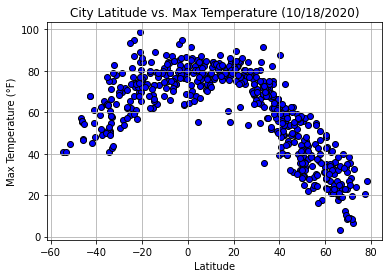

In [133]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (10/18/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

The code is showing a scatterplot of the various max temperatures based on the latitude of the city randomly selected. As latitude approaches 0 (the equater) the temperature increases.

## Latitude vs. Humidity Plot

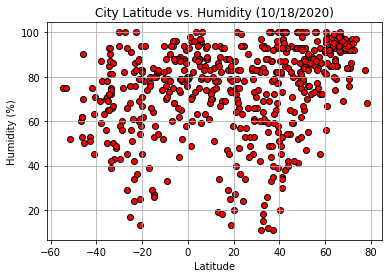

In [134]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (10/18/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

The code is showing a scatterplot of the various humidities based on the latitude of the city randomly selected.

## Latitude vs. Cloudiness Plot

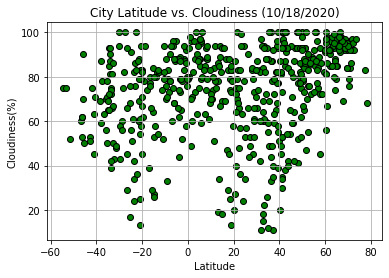

In [135]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (10/18/2020)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

The code is showing a scatterplot of cloudiness around a city based on the latitude of the city randomly selected.

## Latitude vs. Wind Speed Plot

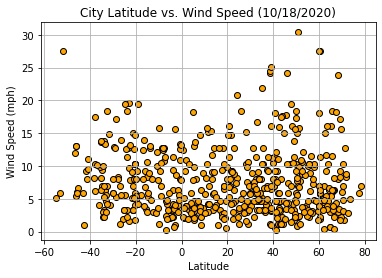

In [136]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolors="orange", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (10/18/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

The code is showing a scatterplot of the various wind speeds based on the latitude of the city randomly selected.

## Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

In [137]:
# Define plotting function:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [138]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Lat"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Lat"] < 0,:]

In [139]:
# Display the Northern Hemisphere Dataframe
northlat_df.head(15)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,55.00,85,100,3.65,US,1603247716
1,Norman Wells,65.28,-126.83,23.00,85,90,16.11,CA,1603247906
3,Carbonia,39.17,8.52,66.20,77,20,16.11,IT,1603247907
4,Bathsheba,13.22,-59.52,82.40,78,40,8.05,BB,1603247907
5,Tigil',57.80,158.67,39.88,72,16,9.89,RU,1603247907
6,Chokurdakh,70.63,147.92,8.89,96,61,4.79,RU,1603247703
7,Ndélé,8.41,20.65,71.11,88,100,2.17,CF,1603247907
8,Torbay,47.67,-52.73,59.00,93,75,19.46,CA,1603247907
9,Avera,33.19,-82.53,68.00,94,1,4.70,US,1603247317
11,Severo-Kuril'sk,50.68,156.12,42.48,65,62,30.38,RU,1603247538


In [140]:
# Display the Southern Hemisphere Dataframe
southlat_df.head(15)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Geraldton,-28.77,114.60,69.80,60,75,17.22,AU,1603247779
10,Cape Town,-33.93,18.42,51.01,81,0,3.36,ZA,1603247534
12,Hermanus,-34.42,19.23,51.01,85,0,3.00,ZA,1603247224
14,Rikitea,-23.12,-134.97,73.92,76,28,9.62,PF,1603247453
16,Poum,-20.23,164.02,75.79,67,1,1.72,NC,1603247561
18,Castro,-24.79,-50.01,62.10,91,41,5.55,BR,1603247462
20,Bredasdorp,-34.53,20.04,41.00,93,0,2.24,ZA,1603247524
23,Cuamba,-14.80,36.54,73.17,53,10,5.32,MZ,1603247910
25,Santa Inês,-3.67,-45.38,77.09,79,26,6.33,BR,1603247910
27,New Norfolk,-42.78,147.06,68.00,53,97,1.01,AU,1603247527


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8797387275008719


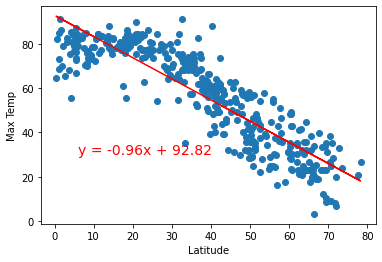

<Figure size 432x288 with 0 Axes>

In [142]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Temp.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6832910214540536


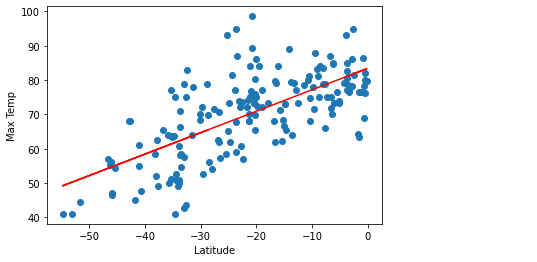

<Figure size 432x288 with 0 Axes>

In [143]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Temp")

# Show Plot
plt.show()

The linear regression is showing the correlation between max temperature and the latitude of the city randomly selected. The r squares are close to -1 and 1 which indicates a strong correlation between the variables confirms our intuition that how north or south a city is would be strongly correlated with the max temperature of that city.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25012413616075874


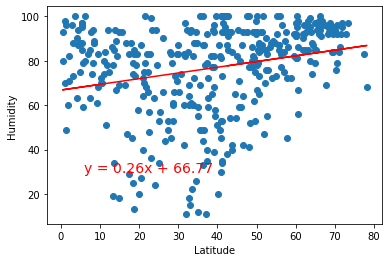

<Figure size 432x288 with 0 Axes>

In [144]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Humidity.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21234634465672889


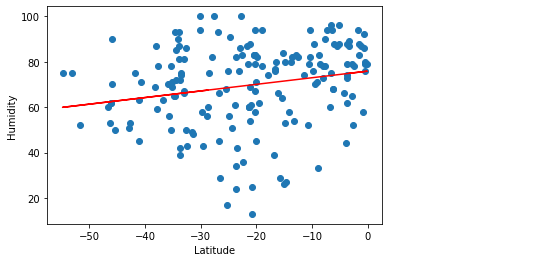

<Figure size 432x288 with 0 Axes>

In [145]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Humidity.png")

# Show Plot
plt.show()

The linear regression is showing the correlation between humidity and the latitude of the city randomly selected. The r squares are both closer to 0 which indicates a weak correlation between the variables confirms our intuition that humidity would not be closely related to the latitude of a city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2456632061444421


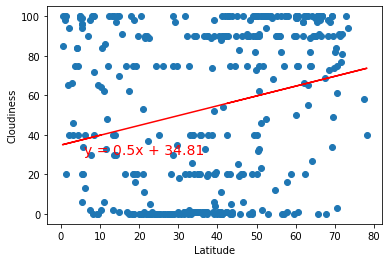

<Figure size 432x288 with 0 Axes>

In [146]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Cloudiness.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1430713387116977


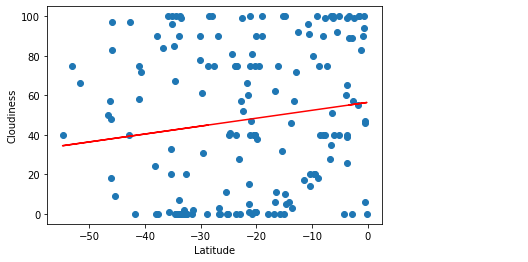

<Figure size 432x288 with 0 Axes>

In [147]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Cloudiness.png")

# Show Plot
plt.show()

The linear regression is showing the correlation between cloudiness and the latitude of the city randomly selected. The r squares are both closer to 0 which indicates a weak correlation between the variables confirms our intuition that cloudiness would not be closely related to the latitude of a city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07363957404326808


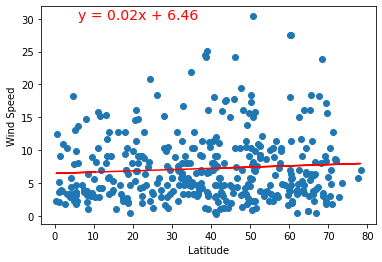

<Figure size 432x288 with 0 Axes>

In [148]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Wind_Speed.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15559268165847817


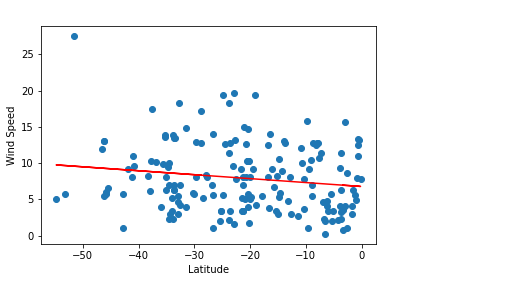

<Figure size 432x288 with 0 Axes>

In [149]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Wind_Speed.png")

# Show Plot
plt.show()

The linear regression is showing the correlation between wind and the latitude of the city randomly selected. The r squares are both closer to 0 which indicates a weak correlation between the variables confirms our intuition that wind speed would not be closely related to the latitude of a city.

# Observable Trends

1. Cities closer to the equater have higher temperatures on average. Vice versa, cities closer to the poles have lower temperatures on average.

2. There is not a statistically significant correlation between humidity, cloudiness, and wind speed and latitude of a city.

3. Even though there is not a strong correlation between wind speed and latitude, high wind speeds (> 20 mph) are more commonly found in cities closer to the poles.